In [93]:
#import libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import re
import matplotlib.dates as mdates
from datetime import timedelta

## Import NESO Carbon Intensity Datasets

In [94]:
#load country forecast
countryForecast = pd.read_csv("https://api.neso.energy/dataset/d8084aa3-8c9e-425c-bf0d-51e0441fc241/resource/e032e7aa-dea5-4695-80d6-19739142021d/download/country_carbon_intensity.csv")

#load national forecast
nationalForecast = pd.read_csv("https://api.neso.energy/dataset/f406810a-1a36-48d2-b542-1dfb1348096e/resource/0e5fde43-2de7-4fb4-833d-c7bca3b658b0/download/gb_carbon_intensity.csv")

#load regional forecast
regionalForecast = pd.read_csv("https://api.neso.energy/dataset/bf3d723b-b4ae-4ec7-9fc9-e584c651a9da/resource/c16b0e19-c02a-44a8-ba05-4db2c0545a2a/download/regional_carbon_intensity.csv")

C:\Users\janvi\AppData\Local\Temp\ipykernel_81676\1578662026.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  nationalForecast = pd.read_csv("https://api.neso.energy/dataset/f406810a-1a36-48d2-b542-1dfb1348096e/resource/0e5fde43-2de7-4fb4-833d-c7bca3b658b0/download/gb_carbon_intensity.csv")


In [95]:
countryForecast

,datetime,Scotland,England,Wales
0,2018-09-17T23:00:00,22.0,91.0,205.0
1,2018-09-17T23:30:00,26.0,92.0,144.0
2,2018-09-18T00:00:00,27.0,93.0,141.0
3,2018-09-18T00:30:00,29.0,93.0,137.0
4,2018-09-18T01:00:00,30.0,94.0,135.0
...,...,...,...,...
117705,2025-06-05T03:30:00,1.0,60.0,31.0
117706,2025-06-05T04:00:00,1.0,63.0,32.0
117707,2025-06-05T04:30:00,1.0,64.0,39.0
117708,2025-06-05T05:00:00,1.0,65.0,35.0


In [96]:
nationalForecast

,datetime,forecast,actual,index
0,2018-01-01T00:00:00,154.0,157.0,low
1,2018-01-01T00:30:00,159.0,164.0,low
2,2018-01-01T01:00:00,169.0,171.0,low
3,2018-01-01T01:30:00,170.0,172.0,low
4,2018-01-01T02:00:00,165.0,172.0,low
...,...,...,...,...
131522,2025-07-03T01:00:00,NaN,NaN,NaN
131523,2025-07-03T01:30:00,NaN,NaN,NaN
131524,2025-07-03T02:00:00,NaN,NaN,NaN
131525,2025-07-03T02:30:00,NaN,NaN,NaN


In [97]:
regionalForecast

,datetime,North Scotland,South Scotland,North West England,North East England,Yorkshire,North Wales and Merseyside,South Wales,West Midlands,East Midlands,East England,South West England,South England,London,South East England
0,2018-09-17T23:00:00,30.0,11.0,38.0,24.0,319.0,157.0,271.0,40.0,325.0,58.0,72.0,116.0,49.0,73.0
1,2018-09-17T23:30:00,44.0,7.0,41.0,30.0,298.0,183.0,157.0,39.0,340.0,61.0,90.0,152.0,69.0,70.0
2,2018-09-18T00:00:00,44.0,8.0,39.0,30.0,295.0,180.0,155.0,39.0,337.0,60.0,89.0,152.0,68.0,70.0
3,2018-09-18T00:30:00,44.0,11.0,37.0,31.0,288.0,175.0,151.0,38.0,330.0,58.0,87.0,150.0,69.0,70.0
4,2018-09-18T01:00:00,45.0,13.0,34.0,32.0,278.0,171.0,148.0,37.0,326.0,57.0,85.0,151.0,70.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116629,2025-06-05T03:30:00,0.0,1.0,12.0,14.0,51.0,38.0,91.0,38.0,58.0,13.0,298.0,257.0,58.0,127.0
116630,2025-06-05T04:00:00,0.0,2.0,11.0,14.0,55.0,43.0,86.0,41.0,63.0,13.0,299.0,259.0,68.0,143.0
116631,2025-06-05T04:30:00,0.0,2.0,9.0,14.0,54.0,40.0,87.0,38.0,62.0,11.0,300.0,259.0,70.0,144.0
116632,2025-06-05T05:00:00,0.0,2.0,7.0,14.0,57.0,24.0,89.0,37.0,62.0,12.0,306.0,287.0,73.0,156.0


# Data Processing and Visualisation

### Forecasted Carbon Intensity By Countries

In [98]:
countryForecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117710 entries, 0 to 117709
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  117710 non-null  object 
 1   Scotland  116407 non-null  float64
 2   England   116407 non-null  float64
 3   Wales     116407 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.6+ MB


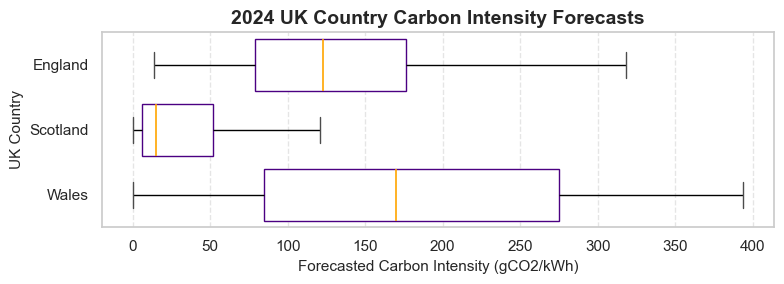

In [ ]:
countries = ["England", "Scotland", "Wales"]

# filter for 2024 
countryForecast["datetime"] = pd.to_datetime(countryForecast["datetime"])
cf2024 = countryForecast[countryForecast["datetime"].dt.year == 2024]

# reshape into format SB bocxplors can use
melted = cf2024[countries].melt(var_name="Region", value_name="Carbon Intensity (gCO2/kWh)")
melted.dropna(inplace=True)

#https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.figure(figsize=(8, 3))
sns.boxplot(
    data=melted,
    y="Region",
    x="Carbon Intensity (gCO2/kWh)",
    orient="h",
    boxprops=dict(edgecolor="indigo", facecolor="white", linewidth=1),
    whiskerprops=dict(color="black", linewidth=1),
    showfliers=False,
    medianprops=dict(color="orange", linewidth=1.2),
    flierprops=dict(marker='|', markersize=4, linestyle='none', color='gray', alpha=0.3)
)

plt.title("2024 UK Country Carbon Intensity Forecasts", fontsize=14, fontweight="bold")
plt.xlabel("Forecasted Carbon Intensity (gCO2/kWh)", fontsize=11)
plt.ylabel("UK Country", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [100]:
countries = ["England", "Scotland", "Wales"]

countryForecast["datetime"] = pd.to_datetime(countryForecast["datetime"])
df_2024 = countryForecast[countryForecast["datetime"].dt.year == 2024]


summary = []

for country in countries:
    data = df_2024[country].dropna()
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    summary.append({
        "Region": country,
        "Mean (gCO₂/kWh)": round(mean, 1),
        "Median": round(median, 1),
        "Std Dev": round(std_dev, 1),
        "IQR": round(iqr, 1)
    })

summary = pd.DataFrame(summary)

summary


,Region,Mean (gCO₂/kWh),Median,Std Dev,IQR
0,England,132.4,123.0,62.6,97.0
1,Scotland,37.7,15.0,47.1,46.0
2,Wales,180.4,170.0,105.3,190.0


### Forecasted Carbon Intensity By Region

In [101]:
regionalForecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116634 entries, 0 to 116633
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   datetime                    116634 non-null  object 
 1   North Scotland              115331 non-null  float64
 2   South Scotland              115331 non-null  float64
 3   North West England          115331 non-null  float64
 4   North East England          115331 non-null  float64
 5   Yorkshire                   115331 non-null  float64
 6   North Wales and Merseyside  115331 non-null  float64
 7   South Wales                 115331 non-null  float64
 8   West Midlands               115331 non-null  float64
 9   East Midlands               115331 non-null  float64
 10  East England                115331 non-null  float64
 11  South West England          115331 non-null  float64
 12  South England               115331 non-null  float64
 13  London        

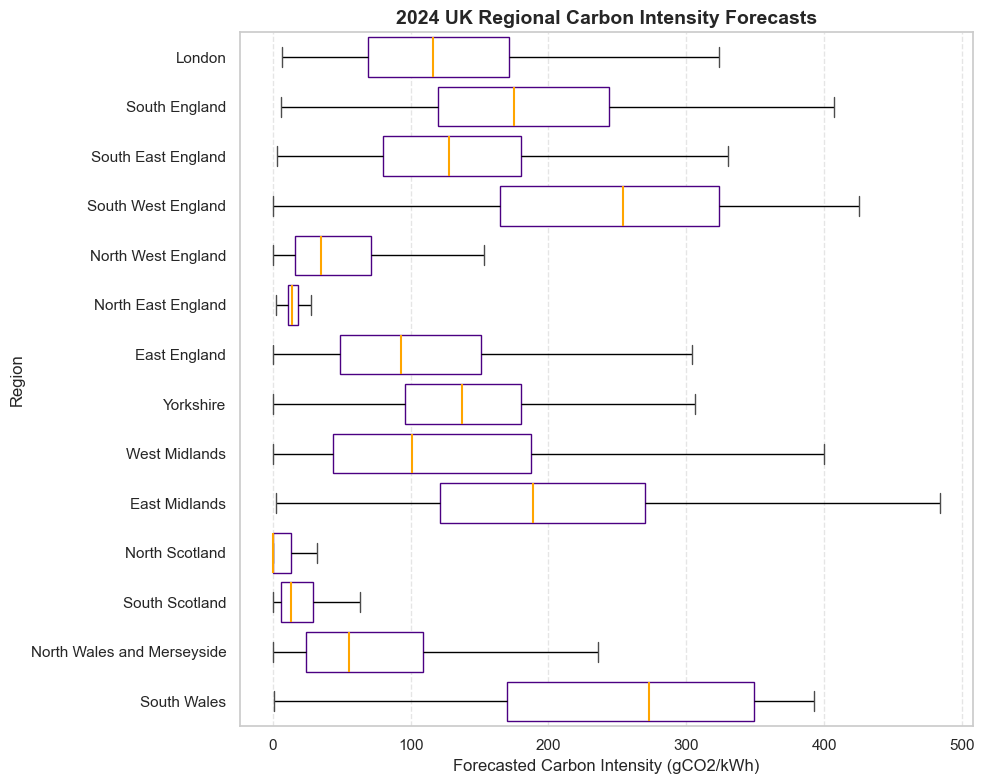

In [ ]:
regions = [
   "London", "South England", "South East England", "South West England", "North West England", "North East England", "East England", "Yorkshire",  "West Midlands", "East Midlands", 
    "North Scotland", "South Scotland", "North Wales and Merseyside", "South Wales"
    
]

# keep only 2024
regionalForecast["datetime"] = pd.to_datetime(regionalForecast["datetime"])
rf2024 = regionalForecast[regionalForecast["datetime"].dt.year == 2024]

# reshape the data so that SB boxplots can plot it
melted = rf2024[regions].melt(var_name="Region", value_name="Carbon Intensity (gCO2/kWh)")
melted.dropna(inplace=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# create boxplots like in mlco2 bloom paper
sns.boxplot(
    data=melted,
    y="Region",
    x="Carbon Intensity (gCO2/kWh)",
    orient="h",
    showfliers=False,
    boxprops=dict(edgecolor="indigo", facecolor="white", linewidth=1),
    whiskerprops=dict(color="black", linewidth=1),
    medianprops=dict(color="orange", linewidth=1.5),
    flierprops=dict(marker='|', markersize=3, linestyle='none', color='gray', alpha=0.3)
)

#plot
plt.title("2024 UK Regional Carbon Intensity Forecasts", fontsize=14, fontweight="bold")
plt.xlabel("Forecasted Carbon Intensity (gCO2/kWh)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [103]:
regions = [
   "London", "South England", "South East England", "South West England", "North West England", "North East England", "East England", "Yorkshire",  "West Midlands", "East Midlands", 
    "North Scotland", "South Scotland", "North Wales and Merseyside", "South Wales"
    
]

# keep 2024 data
regionalForecast["datetime"] = pd.to_datetime(regionalForecast["datetime"])
rf2024 = regionalForecast[regionalForecast["datetime"].dt.year == 2024]

summary = []

for region in regions:
    data = rf2024[region].dropna()
    mean = data.mean()
    median = data.median()
    std = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    summary.append({
        "Region": region,
        "Mean (gCO2/kWh)": round(mean, 1),
        "Median": round(median, 1),
        "Std": round(std, 1),
        "IQR": round(iqr, 1)
    })

summary = pd.DataFrame(summary)

summary


,Region,Mean (gCO2/kWh),Median,Std,IQR
0,London,125.2,116.0,67.9,102.0
1,South England,184.2,175.0,82.1,124.0
2,South East England,135.4,128.0,69.7,100.0
3,South West England,240.0,254.0,100.2,159.0
4,North West England,48.7,35.0,42.4,55.0
5,North East England,21.0,14.0,25.9,7.0
6,East England,108.6,93.0,75.9,102.0
7,Yorkshire,142.5,137.0,56.6,84.0
8,West Midlands,124.1,101.0,92.0,143.0
9,East Midlands,200.0,189.0,95.3,149.0


### National Actual Carbon Intensity 

In [104]:
nationalForecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131527 entries, 0 to 131526
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  131527 non-null  object 
 1   forecast  128643 non-null  float64
 2   actual    127812 non-null  float64
 3   index     128643 non-null  object 
dtypes: float64(2), object(2)
memory usage: 4.0+ MB


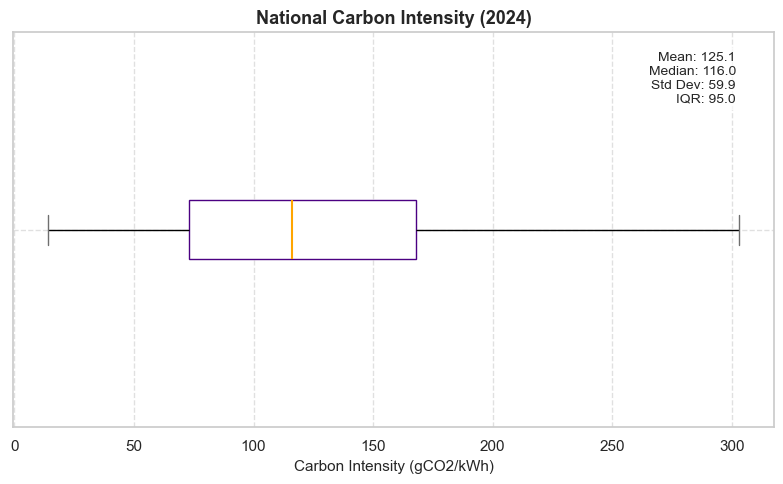

In [105]:
nationalForecast["datetime"] = pd.to_datetime(nationalForecast["datetime"])
df_2024 = nationalForecast[nationalForecast["datetime"].dt.year == 2024]
data = df_2024["actual"]


fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(
    x=data, 
    ax=ax, 
    color="skyblue", 
    width=0.15,
    boxprops=dict(edgecolor="indigo", facecolor="white", linewidth=1),
    whiskerprops=dict(color="black", linewidth=1),
    medianprops=dict(color="orange", linewidth=1.5),
    flierprops=dict(marker='|', markersize=3, linestyle='none', color='gray', alpha=0.3)
)

# stats
mean = data.mean()
median = data.median()
std = data.std()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

avgUKCI = mean

#add stats
stats = (
    f"Mean: {mean:.1f}\n"
    f"Median: {median:.1f}\n"
    f"Std Dev: {std:.1f}\n"
    f"IQR: {iqr:.1f}"
)
ax.text(
    0.95, 0.95, stats, transform=ax.transAxes,
    verticalalignment='top', horizontalalignment='right',
    fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.7)
)

ax.set_title("National Carbon Intensity (2024)", fontsize=13, fontweight="bold")
ax.set_xlabel("Carbon Intensity (gCO2/kWh)", fontsize=11)
ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [106]:
df = nationalForecast.dropna(subset=["actual", "forecast"])
df = df[(df["forecast"] != 0) & (df["actual"] != 0)] #get rid of values equal to exactly 0

y_true = df["actual"]
y_pred = df["forecast"]

mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAPE: {mape:.2f}%")

MAPE: 7.52%


## National Carbon Intensity Seasonal Trends

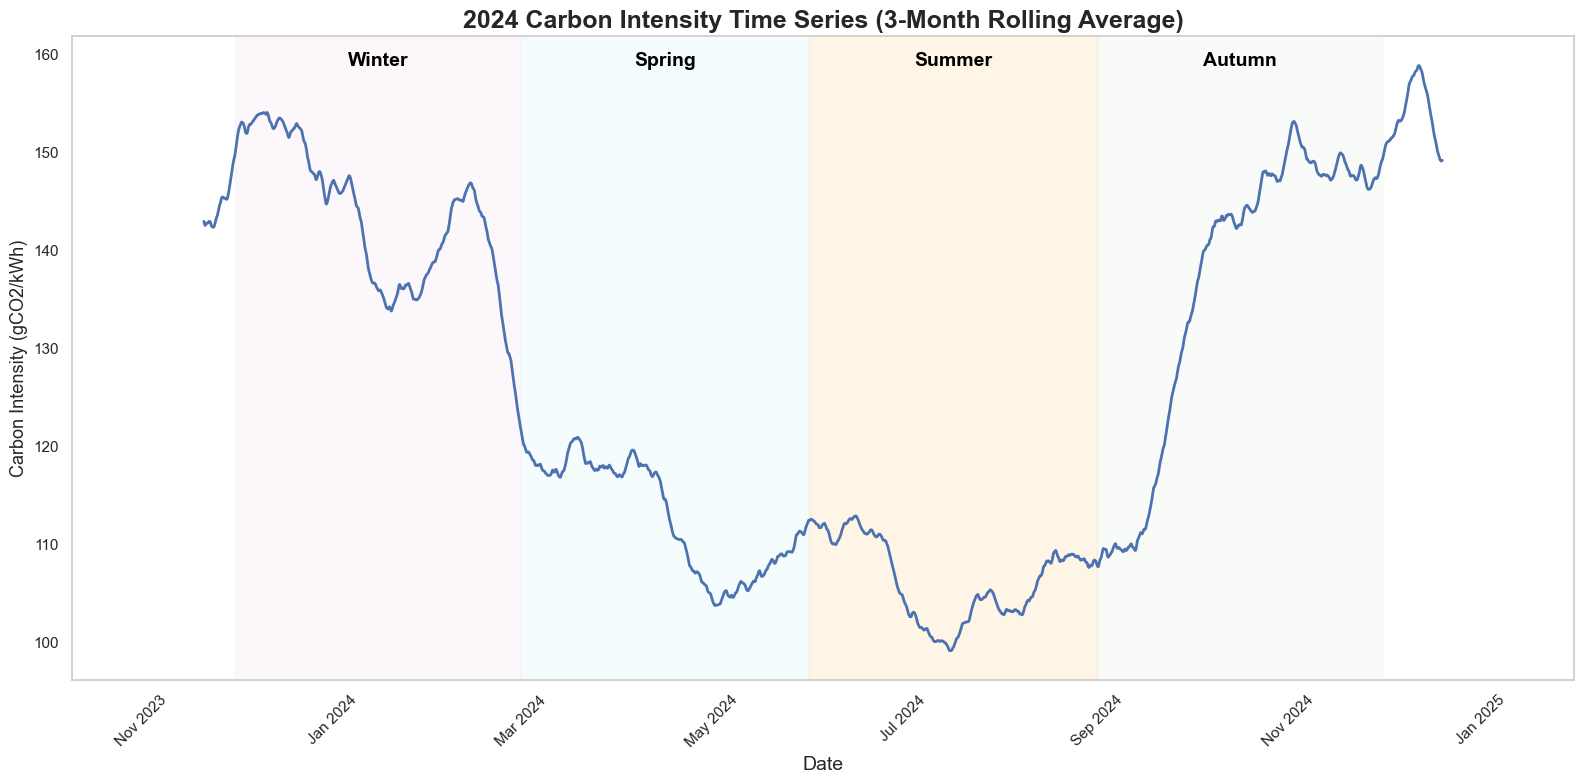

In [107]:
nf = nationalForecast.copy()
nf["datetime"] = pd.to_datetime(nf["datetime"])
nf = nf.set_index("datetime")
nf = nf.sort_index()

#define start and end points for data
plotStart = pd.to_datetime("2023-10-10")
plotEnd = pd.to_datetime("2025-01-31")
window = 4032  # 3 months

#needs reindexing and interpolation due to a brienf chunk of missing data in summer - by a few hours
nf.index = pd.to_datetime(nf.index)
df = nf.copy() 
nf = nf[["actual"]].sort_index()
idx = pd.date_range(start=plotStart, end=plotEnd, freq="30min")
nf = nf.reindex(idx)
nf["actual"] = nf["actual"].interpolate(method="time")
rolling = nf.rolling(window=window, center=True).mean().dropna()

#approx duration of each season 

spans = [
    ("2023-12-01", "2024-03-01", "Winter"),
    ("2024-03-01", "2024-06-01", "Spring"),
    ("2024-06-01", "2024-09-01", "Summer"),
    ("2024-09-01", "2024-12-01", "Autumn"),
]
colours = ['#f3e5f5', '#e0f7fa', '#ffe0b2', '#e8f5e9']

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(rolling.index, rolling["actual"], label="", linewidth=2)

#fill in seasons with colours and label seasons
for (start, end, label), colour in zip(spans, colours):
    startDate = pd.to_datetime(start)
    endDate = pd.to_datetime(end)
    if endDate >= plotStart and startDate <= plotEnd:
        #functions to help determine spans of seasons to plot
        spanStart = max(startDate, plotStart)
        spanEnd = min(endDate, plotEnd)
        ax.axvspan(spanStart, spanEnd, color=colour, alpha=0.3)
        midpoint = spanStart + (spanEnd - spanStart) / 2
        #label season
        ax.text(midpoint, ax.get_ylim()[1] * 0.99, label,
                ha='center', va='top', fontsize=14,
                color='black', fontweight='bold')

ax.set_title("2024 Carbon Intensity Time Series (3-Month Rolling Average)",
             fontsize=18, fontweight='bold')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Carbon Intensity (gCO2/kWh)", fontsize=13)
#ax.legend(fontsize=15)
ax.grid(False)
ax.set_xlim(plotStart, plotEnd)

#convert numbers to names ofmonths
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trends based on Times of Day

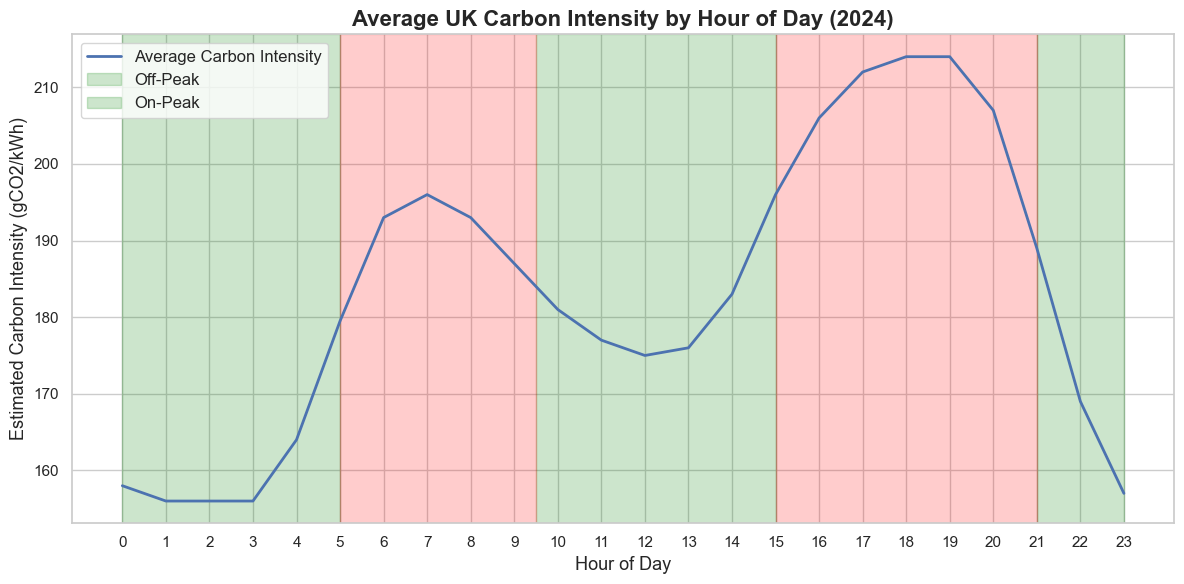

In [108]:
#firstly obtain hours for index
df['hour'] = df.index.hour 

#group by hour and then average
hourlyAvg = df.groupby('hour')[["actual"]].median() 

fig, ax = plt.subplots(figsize=(12, 6))
hourlyAvg.plot(ax=ax, linewidth=2)

# adds ahading for on and off peak
# assume off peak are the troughs 10PM to 5AM and 9AM to 2PM
ax.axvspan(0, 5, color='green', alpha=0.2, label='Off-Peak')
ax.axvspan(9.5, 15, color='green', alpha=0.2)
ax.axvspan(21, 23, color='green', alpha=0.2)

# assume on peak 6AM to 9AM and 4PM to 8PM
ax.axvspan(5, 9.5, color='red', alpha=0.2, label='On-Peak')
ax.axvspan(15, 21, color='red', alpha=0.2)

ax.set_title("Average UK Carbon Intensity by Hour of Day (2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Hour of Day", fontsize=13)
ax.set_ylabel("Estimated Carbon Intensity (gCO2/kWh)", fontsize=13)
ax.grid(True)
ax.legend(["Average Carbon Intensity", "Off-Peak", "On-Peak"], fontsize=12)
plt.xticks(range(0, 24))  # Show all hours

plt.tight_layout()
plt.show()


# Visualisations for Factors Affecting Training Emissions

## Temporal Effects (By Season)

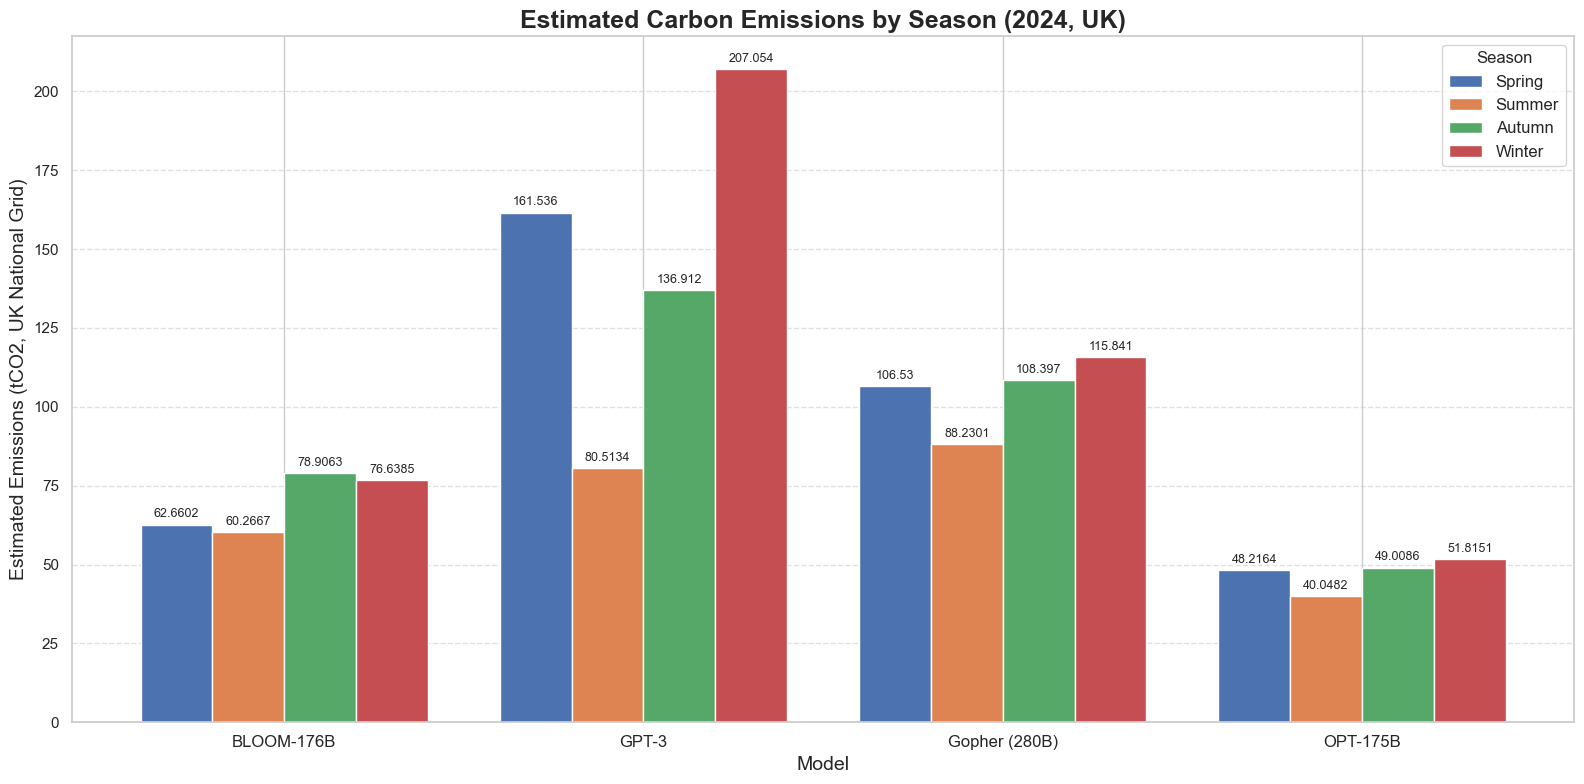

In [109]:
def getTemporalCarbonEstimation(startTime, estimatedDurationHours, totalEnergyConsumedMWH, CIseries):
    endTime = startTime + timedelta(hours=estimatedDurationHours)
    CIwindow = CIseries.loc[startTime:endTime] # window for how long model will be trained for
    intervalEnergy = (totalEnergyConsumedMWH * 1000) / len(CIwindow)
    totalEmissions = (CIwindow["actual"] * intervalEnergy).sum() / 1e6  # to get tonnes
    return totalEmissions

seasonStartDates = {
    'Winter': pd.to_datetime('2023-12-01'),
    'Spring': pd.to_datetime('2024-03-01'),
    'Summer': pd.to_datetime('2024-06-01'),
    'Autumn': pd.to_datetime('2024-09-01')
}

models = [
    {"Model": "GPT-3", "Estimated Training Time (hrs)": 233.333333, "Estimated Energy (MWh)": 1092},
    {"Model": "Gopher (280B)", "Estimated Training Time (hrs)": 926.278794, "Estimated Energy (MWh)": 901.463415},
    {"Model": "OPT-175B", "Estimated Training Time (hrs)": 912.937262, "Estimated Energy (MWh)": 407.593622},
    {"Model": "BLOOM-176B", "Estimated Training Time (hrs)": 3097.442754, "Estimated Energy (MWh)": 570.920648},
]


results = []
for season, startTime in seasonStartDates.items():
    for row in models:  
        emissions = getTemporalCarbonEstimation(
            startTime,
            row['Estimated Training Time (hrs)'],
            row['Estimated Energy (MWh)'],
            nf 
        )
        results.append({
            'Model': row['Model'],
            'Season': season,
            'Estimated Emissions (tCO2)': emissions
        })


emissions = pd.DataFrame(results)

#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

#need to transpose rws toc columns for plot
pivotedModel = emissions.pivot(index="Model", columns="Season", values="Estimated Emissions (tCO2)")
seasonOrder = ['Spring', 'Summer', 'Autumn', 'Winter']
pivotedModel = pivotedModel[seasonOrder]

models = pivotedModel.index.tolist()
seasons = pivotedModel.columns.tolist()
x = np.arange(len(models))   

width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(16, 8))

for season in seasons:
    offset = width * multiplier
    y_vals = pivotedModel[season].values
    rects = ax.bar(x + offset, y_vals, width=width, label=season)
    ax.bar_label(rects, padding=3, fontsize=9)
    multiplier += 1

ax.set_title("Estimated Carbon Emissions by Season (2024, UK)", fontsize=18, fontweight='bold')
ax.set_ylabel("Estimated Emissions (tCO2, UK National Grid)", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_xticks(x + width * (len(seasons) - 1) / 2)
ax.set_xticklabels(models, fontsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Season", fontsize=12)
plt.tight_layout()
plt.show()


## Temporal Effects (Hours of Day)

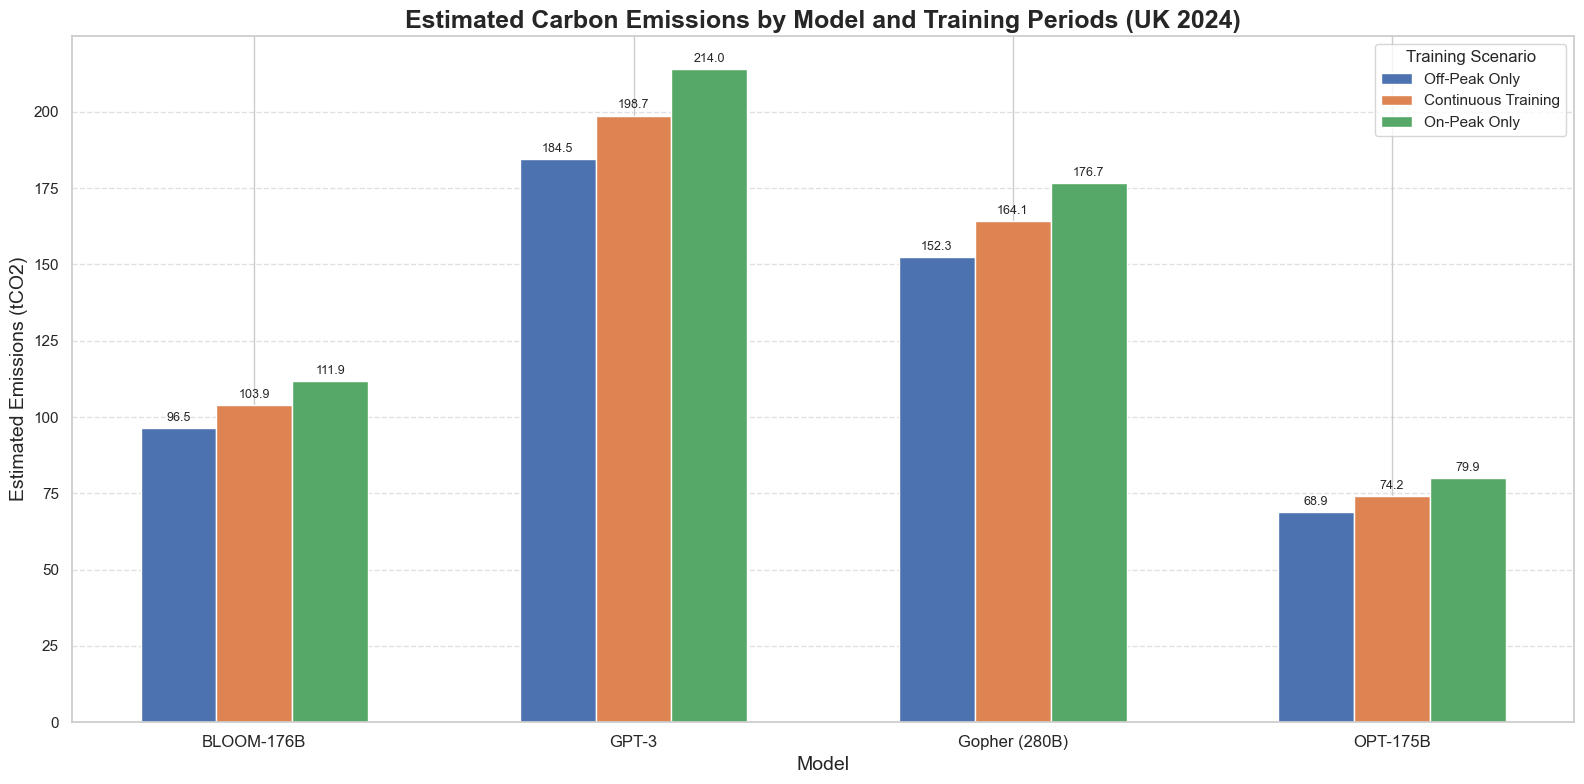

In [110]:
# define off and on peak hours (rounded)
offPeak = list(range(0, 5)) + list(range(10, 15)) + list(range(21, 24))
onPeak = list(range(5, 10)) + list(range(15, 21))

# get avg CI for peak and off peak and full day
offPeakAvg= hourlyAvg.loc[offPeak].median().values[0]
onPeakAvg = hourlyAvg.loc[onPeak].median().values[0]
fullDayAvg = hourlyAvg["actual"].median()

models = [
    {"Model": "BLOOM-176B", "Estimated Training Time (hrs)": 3097.442754, "Estimated Energy (MWh)": 570.920648},
    {"Model": "GPT-3", "Estimated Training Time (hrs)": 233.333333, "Estimated Energy (MWh)": 1092},
    {"Model": "Gopher (280B)", "Estimated Training Time (hrs)": 926.278794, "Estimated Energy (MWh)": 901.463415},
    {"Model": "OPT-175B", "Estimated Training Time (hrs)": 912.937262, "Estimated Energy (MWh)": 407.593622},
    
]

results = []
for model in models:
    energykWh = model['Estimated Energy (MWh)'] * 1000  
    offPeakEmissions = (offPeakAvg * energykWh) / 1e6  
    onPeakEmissions = (onPeakAvg * energykWh) / 1e6    
    continuousEmissions = (fullDayAvg * energykWh) / 1e6

    results.append({
        "Model": model["Model"],
        "Off-Peak Only": offPeakEmissions,
        "On-Peak Only": onPeakEmissions,
        "Continuous Training" : continuousEmissions
    })

hourlyEmissions = pd.DataFrame(results)
pivoted = hourlyEmissions.set_index("Model")  # Models as index, scenarios as columns
models = pivoted.index.tolist()
scenarios = ["Off-Peak Only", "Continuous Training", "On-Peak Only"]

x = np.arange(len(models))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(16, 8))

for i, scenario in enumerate(scenarios):
    offset = i * bar_width
    y_vals = pivoted[scenario].values
    bars = ax.bar(x + offset, y_vals, width=bar_width, label=scenario)
    ax.bar_label(bars, fmt="%.1f", fontsize=9, padding=3)

ax.set_title("Estimated Carbon Emissions by Model and Training Periods (UK 2024)", fontsize=18, fontweight='bold')
ax.set_ylabel("Estimated Emissions (tCO2)", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_xticks(x + bar_width * (len(scenarios) - 1) / 2)
ax.set_xticklabels(models, fontsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Training Scenario", fontsize=11)
plt.tight_layout()
plt.show()

## Temporal Effects (By Country)

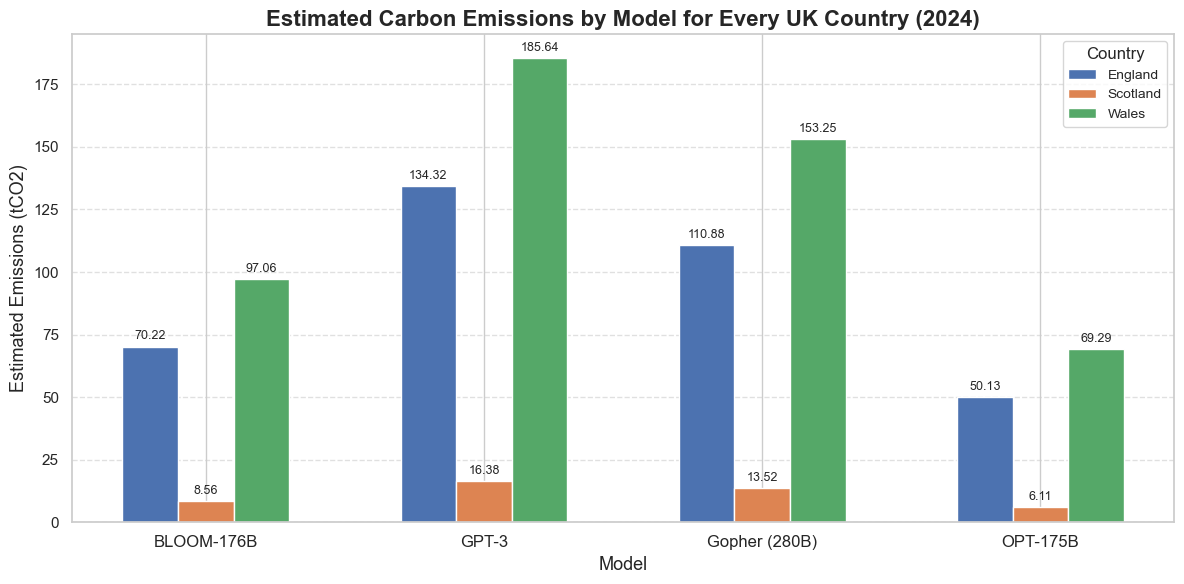

In [111]:
avgCI = cf2024[countries].median().round(2)

models = [
    {"Model": "BLOOM-176B", "Estimated Training Time (hrs)": 3097.442754, "Estimated Energy (MWh)": 570.920648},
    {"Model": "GPT-3", "Estimated Training Time (hrs)": 233.333333, "Estimated Energy (MWh)": 1092},
    {"Model": "Gopher (280B)", "Estimated Training Time (hrs)": 926.278794, "Estimated Energy (MWh)": 901.463415},
    {"Model": "OPT-175B", "Estimated Training Time (hrs)": 912.937262, "Estimated Energy (MWh)": 407.593622},
    
]

emissions = []
for model in models:
    row = {"Model": model["Model"]}
    for country in countries:
        ci = avgCI[country] 
        energy_kWh = model["Estimated Energy (MWh)"] * 1000  
        emissions_tCO2 = (ci * energy_kWh) / 1e6 
        row[country] = emissions_tCO2
    emissions.append(row)

emissions = pd.DataFrame(emissions)
emissions.set_index("Model", inplace=True)

models = emissions.index.tolist()
countries = emissions.columns.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(models))

for i, country in enumerate(countries):
    offset = i * bar_width
    values = emissions[country].values  
    bars = ax.bar(x + offset, values, width=bar_width, label=country)
    ax.bar_label(bars, fmt="%.2f", fontsize=9, padding=3)

ax.set_title("Estimated Carbon Emissions by Model for Every UK Country (2024)", fontsize=16, fontweight='bold')
ax.set_ylabel("Estimated Emissions (tCO2)", fontsize=13)
ax.set_xlabel("Model", fontsize=13)
ax.set_xticks(x + bar_width * (len(countries) - 1) / 2)
ax.set_xticklabels(models, fontsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Country", fontsize=10)
plt.tight_layout()
plt.show()

## Temporal Effects (By Region)

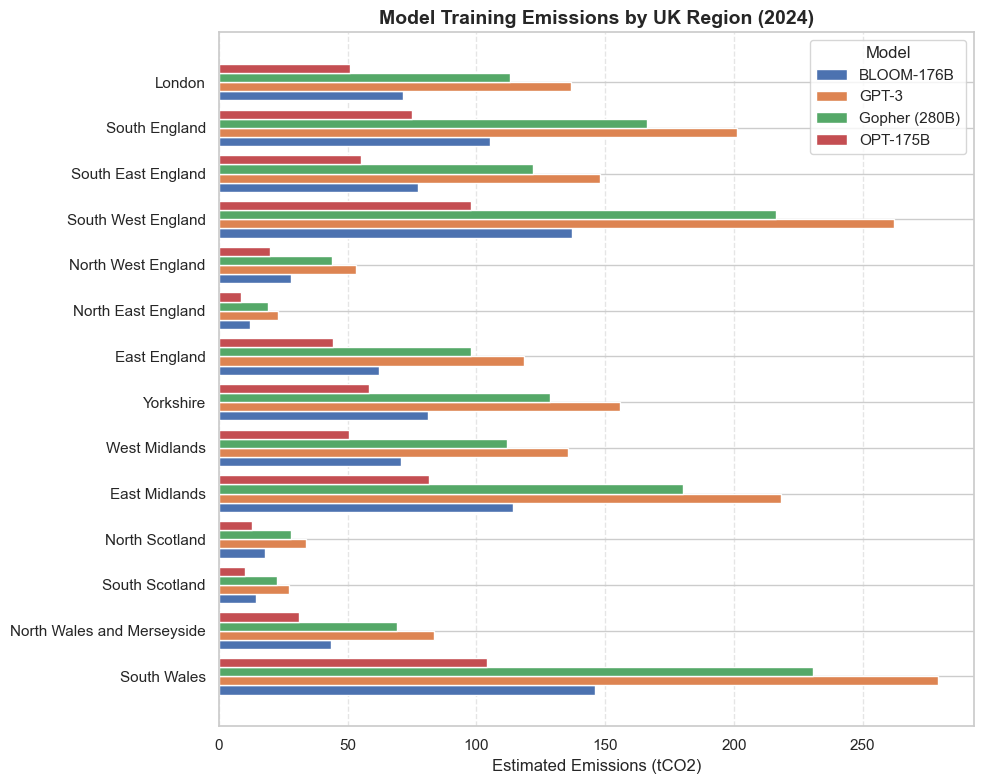

In [112]:
regions= [
    "South Wales", "North Wales and Merseyside", "South Scotland", "North Scotland", "East Midlands", "West Midlands", "Yorkshire", "East England",
    "North East England", "North West England", "South West England", "South East England",  "South England", "London"
]

avgCI = rf2024[regions].mean()

models = [
    {"Model": "BLOOM-176B", "Estimated Training Time (hrs)": 3097.442754, "Estimated Energy (MWh)": 570.920648},
    {"Model": "GPT-3", "Estimated Training Time (hrs)": 233.333333, "Estimated Energy (MWh)": 1092},
    {"Model": "Gopher (280B)", "Estimated Training Time (hrs)": 926.278794, "Estimated Energy (MWh)": 901.463415},
    {"Model": "OPT-175B", "Estimated Training Time (hrs)": 912.937262, "Estimated Energy (MWh)": 407.593622},
    
]

emissions = []
for region in regions:
    for model in models:
        emission = (avgCI[region] * model["Estimated Energy (MWh)"] * 1000) / 1e6  
        emissions.append({
            "Region": region,
            "Model": model["Model"],
            "Estimated Emissions (tCO2)": emission
        })

emissions = pd.DataFrame(emissions)

pivotedEmissions = emissions.pivot(index="Region", columns="Model", values="Estimated Emissions (tCO2)")

pivotedEmissions = pivotedEmissions.reindex(regions)

fig, ax = plt.subplots(figsize=(10, 8))
bar_height = 0.2
x = np.arange(len(pivotedEmissions.index))  

for i, model in enumerate(pivotedEmissions.columns):
    offset = (i - 1.5) * bar_height  
    ax.barh(x + offset, pivotedEmissions[model], height=bar_height, label=model)

ax.set_yticks(x)
ax.set_yticklabels(pivotedEmissions.index, fontsize=11)
ax.set_xlabel("Estimated Emissions (tCO2)", fontsize=12)
ax.set_title("Model Training Emissions by UK Region (2024)", fontsize=14, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.legend(title="Model")
plt.tight_layout()
plt.show()

## visualising performance tradeoffs

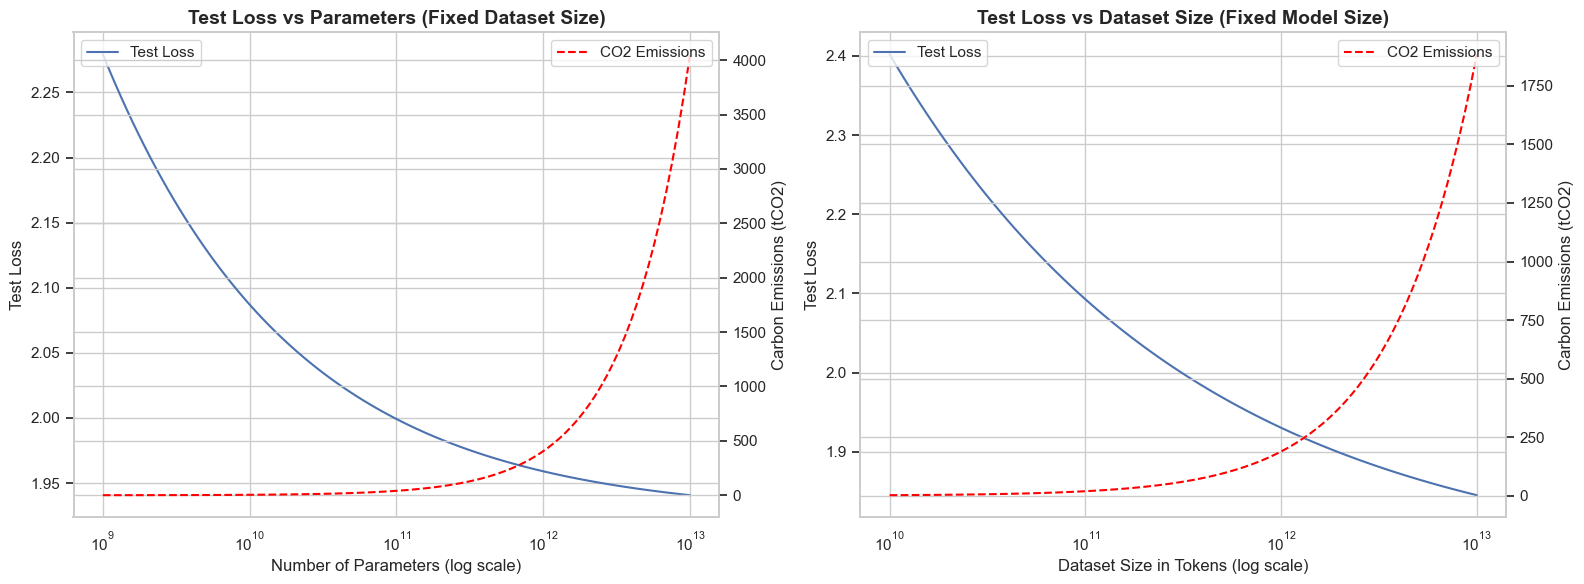

In [113]:
def getLoss(N, D):
    ##scaling law from hoffman et al
    E = 1.69
    A = 406.4
    B = 410.7
    return E + (A / (N**0.34)) + (B / (D**0.28))

NSweep = np.logspace(9, 13, 100)   # 1B to 10T parameters
DSweep = np.logspace(10, 13, 100)  # 10B to 10T tokens

# fixed constants (using bloom values) epoch =1 dataset size = 379000000000 params = 176247271424
DFixed = 379000000000  
NFixed = 176247271424 
epochs = 1 

# Hardware specs
hardwareQty = 384
maxThroughput = 3.12e14  # FLOPs/s per GPU
computeUtilisation = 0.3
throughput = hardwareQty * maxThroughput * computeUtilisation  
TDP = 400

#datacenter specs
PUE = 1.2

#carbon intensity data
avgUKCarbon = avgUKCI

# estimate training time
trainingTimeEstimateFixedD = (6 * NSweep * DFixed * epochs) / (throughput * 3600)
trainingTimeEstimateFixedN = (6 * NFixed * DSweep * epochs) / (throughput * 3600)

# estimate energy in kWh
trainingEnergyEstimateFixedD = trainingTimeEstimateFixedD * hardwareQty * TDP * PUE * 0.001
trainingEnergyEstimateFixedN = trainingTimeEstimateFixedN * hardwareQty * TDP * PUE * 0.001

# estimate carbon in tCO2
trainingCarbonEstimateFixedD = (trainingEnergyEstimateFixedD * avgUKCarbon) / 1e6
trainingCarbonEstimateFixedN = (trainingEnergyEstimateFixedN * avgUKCarbon) / 1e6

#calculate all losses

lossFixedD = getLoss(NSweep, DFixed)
lossFixedN = getLoss(NFixed, DSweep)

#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(NSweep, lossFixedD, label='Test Loss')
ax[0].set_xscale('log')
ax[0].set_title('Test Loss vs Parameters (Fixed Dataset Size)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Parameters (log scale)', fontsize=12)
ax[0].set_ylabel('Test Loss', fontsize=12)
ax[0].grid(True)
ax1 = ax[0].twinx()
ax1.plot(NSweep, trainingCarbonEstimateFixedD, color='red', linestyle='--', label='CO2 Emissions')
ax1.set_ylabel('Carbon Emissions (tCO2)', fontsize=12)
ax1.tick_params(axis='y')
ax[0].legend(loc='upper left')
ax1.legend(loc='upper right')

ax[1].plot(DSweep, lossFixedN, label='Test Loss')
ax[1].set_xscale('log')
ax[1].set_title('Test Loss vs Dataset Size (Fixed Model Size)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Dataset Size in Tokens (log scale)', fontsize=12)
ax[1].set_ylabel('Test Loss', fontsize=12)
ax[1].grid(True)
ax2 = ax[1].twinx()
ax2.plot(DSweep, trainingCarbonEstimateFixedN, color='red', linestyle='--', label='CO2 Emissions')
ax2.set_ylabel('Carbon Emissions (tCO2)', fontsize=12)
ax2.tick_params(axis='y')
ax[1].legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [114]:
# +/- 1 change in model specs
NPlus1 = NFixed * 1.01
DPlus1 = DFixed * 1.01
NMin1 = NFixed * 0.99
DMin1 = DFixed * 0.99

# losses
lossNPlus1 = getLoss(NPlus1, DFixed)
lossDPlus1 = getLoss(NFixed, DPlus1)
lossNMin1 = getLoss(NMin1, DFixed)
lossDMin1 = getLoss(NFixed, DMin1)

# training times
timeNPlus1 = (6 * NPlus1 * DFixed * epochs) / (throughput * 3600)
timeDPlus1 = (6 * NFixed * DPlus1 * epochs) / (throughput * 3600)
timeNMin1 = (6 * NMin1 * DFixed * epochs) / (throughput * 3600)
timeDMin1 = (6 * NFixed * DMin1 * epochs) / (throughput * 3600)

# energy estimates
energyNPlus1 = timeNPlus1 * hardwareQty * TDP * PUE * 0.001
energyDPlus1 = timeDPlus1 * hardwareQty * TDP * PUE * 0.001
energyNMin1 = timeNMin1 * hardwareQty * TDP * PUE * 0.001
energyDMin1 = timeDMin1 * hardwareQty * TDP * PUE * 0.001

# carbon emissions
carbonNPlus1 = (energyNPlus1 * avgUKCarbon) / 1e6
carbonDPlus1 = (energyDPlus1 * avgUKCarbon) / 1e6
carbonNMin1 = (energyNMin1 * avgUKCarbon) / 1e6
carbonDMin1 = (energyDMin1 * avgUKCarbon) / 1e6

#define baseline
baselineLoss = getLoss(NFixed, DFixed)
baselineTime = (6 * NFixed * DFixed * epochs) / (throughput * 3600)
baselineEnergy = baselineTime * hardwareQty * TDP * PUE * 0.001
baselineCarbon = (baselineEnergy * avgUKCarbon) / 1e6

scenarios = [
    ("+1% Params", NPlus1, DFixed, lossNPlus1, carbonNPlus1),
    ("+1% Dataset", NFixed, DPlus1, lossDPlus1, carbonDPlus1),
    ("-1% Params", NMin1, DFixed, lossNMin1, carbonNMin1),
    ("-1% Dataset", NFixed, DMin1, lossDMin1, carbonDMin1),
]

results = []
for label, N, D, loss, carbon in scenarios:
    results.append({
        "Scenario": label,
        "Δ Loss (%)": round(((loss - baselineLoss) / baselineLoss) * 100, 4),
        "Δ CO2 (%)": round(((carbon - baselineCarbon) / baselineCarbon) * 100, 4),
    })

display(pd.DataFrame(results))


,Scenario,Δ Loss (%),Δ CO2 (%)
0,+1% Params,-0.0104,1.0
1,+1% Dataset,-0.0330,1.0
2,-1% Params,0.0105,-1.0
3,-1% Dataset,0.0334,-1.0


## Hardware Chpice Impacts

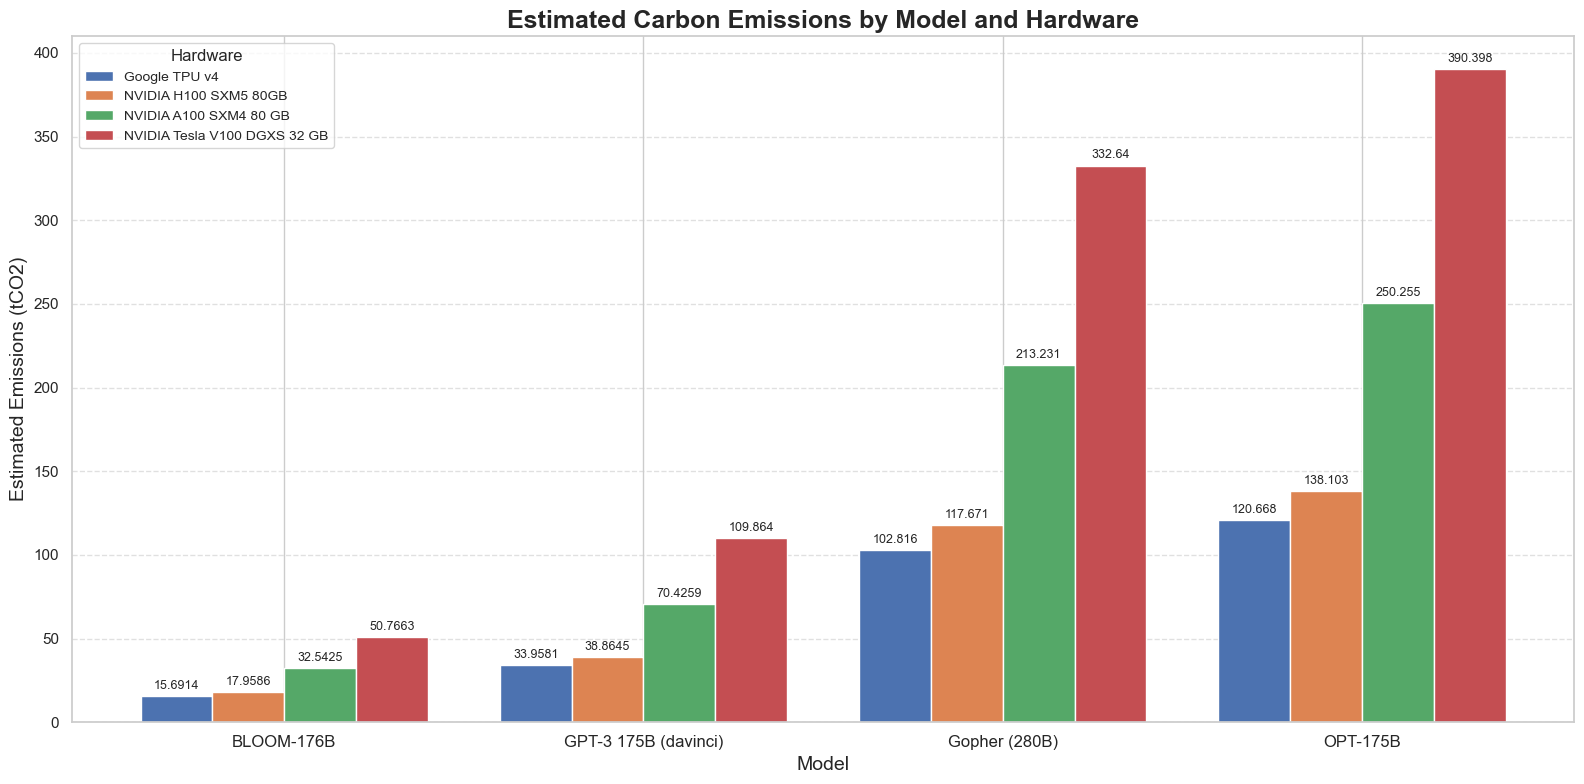

In [115]:
#get model and hardware specs
models = pd.read_csv("notable_ai_models.csv")
hardware = pd.read_csv("ml_hardware.csv")

# select 4 models from bloom study and add carbon intensity and pue info
models = models[models["Model"].isin(["BLOOM-176B", "GPT-3 175B (davinci)", "Gopher (280B)", "OPT-175B"])]
models["PUE"] = [1.2, 1.56, 1.08, 1.09]
models["Carbon Intensity"] = [57, 429, 330, 231]

#select 4 accelerators to test
hardware = hardware[hardware["Hardware name"].isin(["NVIDIA A100 SXM4 80 GB", "NVIDIA Tesla V100 DGXS 32 GB", "Google TPU v4", "NVIDIA H100 SXM5 80GB"])]

#perform a cross join so we have 16 combinations of setups https://www.geeksforgeeks.org/python-program-to-perform-cross-join-in-pandas/
models["key"] = 1
hardware["key"] = 1
mergedTestDataset = pd.merge(models, hardware, on="key").drop(columns="key")

mergedTestDataset = mergedTestDataset[[
    "Model",
    "Hardware name",
    "Parameters",
    "Epochs",
    "Training dataset size (datapoints)",
    "Hardware quantity",
    "Tensor-FP16/BF16 performance (FLOP/s)",
    "TDP (W)",
    "PUE",
    "Carbon Intensity"
]]

mergedTestDataset["Estimated Training Time (hours)"] = (6 * mergedTestDataset['Parameters'] * mergedTestDataset['Training dataset size (datapoints)'] * mergedTestDataset['Epochs']) / (mergedTestDataset['Hardware quantity'] * mergedTestDataset['Tensor-FP16/BF16 performance (FLOP/s)'] * 0.3 * 3600)
mergedTestDataset["Estimated Energy (kWh)"] = (mergedTestDataset["Estimated Training Time (hours)"]) * (mergedTestDataset["Hardware quantity"] * mergedTestDataset["TDP (W)"] / 1000) * mergedTestDataset["PUE"]
mergedTestDataset["Training Carbon Estimate (tCO2)"] = mergedTestDataset["Estimated Energy (kWh)"] * mergedTestDataset["Carbon Intensity"] / 1e6 
mergedTestDataset["Theoretical Peak Efficiency (FLOP/s per Watt)"] = (mergedTestDataset["Tensor-FP16/BF16 performance (FLOP/s)"] / mergedTestDataset["TDP (W)"])

pivotedModel = mergedTestDataset.pivot(index="Model", columns="Hardware name", values="Training Carbon Estimate (tCO2)")
hardwareOrder = ["Google TPU v4", "NVIDIA H100 SXM5 80GB" , "NVIDIA A100 SXM4 80 GB", "NVIDIA Tesla V100 DGXS 32 GB",  ]
pivotedModel = pivotedModel[hardwareOrder]

models = pivotedModel.index.tolist()
hardwares = pivotedModel.columns.tolist()
x = np.arange(len(models))

width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(16, 8))

for hardware in hardwares:
    offset = width * multiplier
    y_vals = pivotedModel[hardware].values
    rects = ax.bar(x + offset, y_vals, width=width, label=hardware)
    ax.bar_label(rects, padding=3, fontsize=9)
    multiplier += 1

ax.set_title("Estimated Carbon Emissions by Model and Hardware", fontsize=18, fontweight='bold')
ax.set_ylabel("Estimated Emissions (tCO2)", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_xticks(x + width * (len(hardwares) - 1) / 2)
ax.set_xticklabels(models, fontsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Hardware", fontsize=10)
plt.tight_layout()
plt.show()


In [116]:
mergedTestDataset

,Model,Hardware name,Parameters,Epochs,Training dataset size (datapoints),Hardware quantity,Tensor-FP16/BF16 performance (FLOP/s),TDP (W),PUE,Carbon Intensity,Estimated Training Time (hours),Estimated Energy (kWh),Training Carbon Estimate (tCO2),Theoretical Peak Efficiency (FLOP/s per Watt)
0,BLOOM-176B,NVIDIA H100 SXM5 80GB,1.762473e+11,1.0000,3.790000e+11,384.0,9.894000e+14,700.0,1.20,57,976.755750,3.150623e+05,17.958553,1.413429e+12
1,BLOOM-176B,Google TPU v4,1.762473e+11,1.0000,3.790000e+11,384.0,2.750000e+14,170.0,1.20,57,3514.189598,2.752876e+05,15.691391,1.617647e+12
2,BLOOM-176B,NVIDIA A100 SXM4 80 GB,1.762473e+11,1.0000,3.790000e+11,384.0,3.120000e+14,400.0,1.20,57,3097.442754,5.709206e+05,32.542477,7.800000e+11
3,BLOOM-176B,NVIDIA Tesla V100 DGXS 32 GB,1.762473e+11,1.0000,3.790000e+11,384.0,1.250000e+14,250.0,1.20,57,7731.217115,8.906362e+05,50.766264,5.000000e+11
4,OPT-175B,NVIDIA H100 SXM5 80GB,1.750000e+11,1.6667,1.800000e+11,1024.0,9.894000e+14,700.0,1.56,429,287.888039,3.219187e+05,138.103126,1.413429e+12
5,OPT-175B,Google TPU v4,1.750000e+11,1.6667,1.800000e+11,1024.0,2.750000e+14,170.0,1.56,429,1035.768821,2.812784e+05,120.668413,1.617647e+12
6,OPT-175B,NVIDIA A100 SXM4 80 GB,1.750000e+11,1.6667,1.800000e+11,1024.0,3.120000e+14,400.0,1.56,429,912.937262,5.833450e+05,250.255005,7.800000e+11
7,OPT-175B,NVIDIA Tesla V100 DGXS 32 GB,1.750000e+11,1.6667,1.800000e+11,1024.0,1.250000e+14,250.0,1.56,429,2278.691406,9.100182e+05,390.397808,5.000000e+11
8,Gopher (280B),NVIDIA H100 SXM5 80GB,2.800000e+11,1.0000,3.000000e+11,4096.0,9.894000e+14,700.0,1.08,330,115.152913,3.565797e+05,117.671316,1.413429e+12
9,Gopher (280B),Google TPU v4,2.800000e+11,1.0000,3.000000e+11,4096.0,2.750000e+14,170.0,1.08,330,414.299242,3.115636e+05,102.816000,1.617647e+12
